In [6]:
from google.colab import files
uploaded = files.upload()

Saving student_feedback.csv to student_feedback (2).csv


In [7]:
import pandas as pd

# Load the uploaded file
df = pd.read_csv("student_feedback.csv")   # use the exact file name

# Show first 5 rows
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [8]:
import pandas as pd

df = pd.read_csv("student_feedback.csv")
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [14]:
import pandas as pd

# Load the uploaded CSV
df = pd.read_csv("student_feedback.csv")

# Show first few rows
df.head()


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [16]:
print(df.columns.tolist())

['Unnamed: 0', 'Student ID', 'Well versed with the subject', 'Explains concepts in an understandable way', 'Use of presentations', 'Degree of difficulty of assignments', 'Solves doubts willingly', 'Structuring of the course', 'Provides support for students going above and beyond', 'Course recommendation based on relevance']


In [17]:
import pandas as pd

# Load CSV
df = pd.read_csv("/content/student_feedback.csv")

# Drop the unnecessary index column
df = df.drop(columns=['Unnamed: 0'])

# Show first few rows
print(df.head())

# Convert all feedback columns (except Student ID) to numeric (in case some values are text)
for col in df.columns:
    if col != 'Student ID':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows where all feedback is missing
df = df.dropna(how='all', subset=df.columns[1:])

# Calculate average rating per question
avg_per_question = df.drop(columns=['Student ID']).mean()

print("\nAverage rating for each feedback question:\n")
print(avg_per_question)

# Calculate overall average rating per student
df['Overall Average'] = df.drop(columns=['Student ID']).mean(axis=1)

print("\nOverall average rating per student:\n")
print(df[['Student ID', 'Overall Average']].head())

   Student ID  Well versed with the subject  \
0         340                             5   
1         253                             6   
2         680                             7   
3         806                             9   
4         632                             8   

   Explains concepts in an understandable way  Use of presentations  \
0                                           2                     7   
1                                           5                     8   
2                                           7                     6   
3                                           6                     7   
4                                          10                     8   

   Degree of difficulty of assignments  Solves doubts willingly  \
0                                    6                        9   
1                                    6                        2   
2                                    5                        4   
3                     

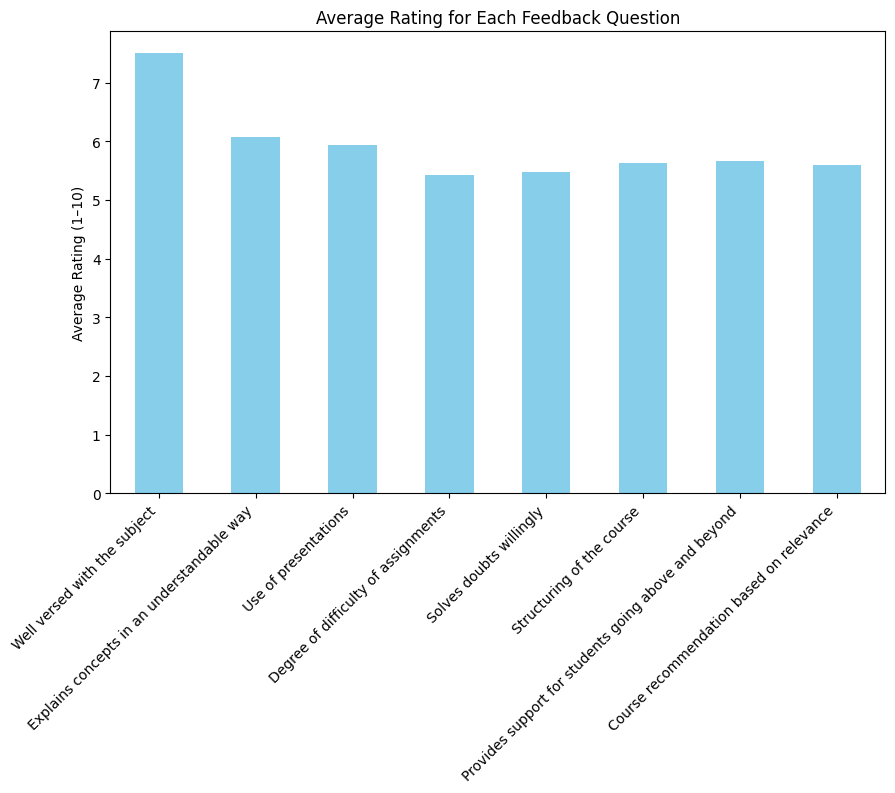

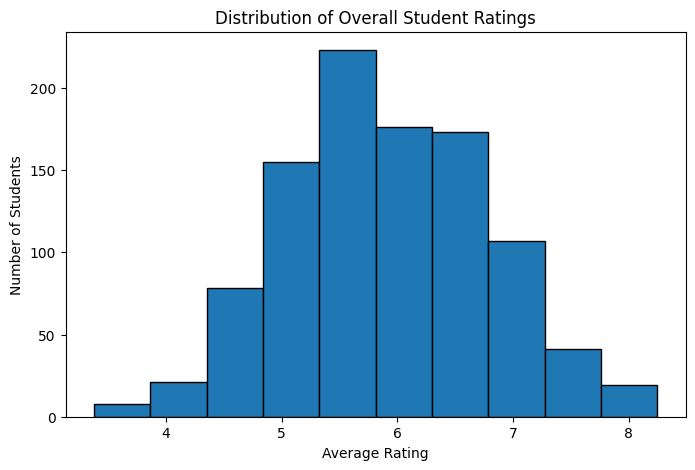

In [22]:
import matplotlib.pyplot as plt

# --- Bar Chart: Average per Question ---
avg_ratings = df.iloc[:, 1:-1].mean()   # exclude Student ID & Overall Average

plt.figure(figsize=(10,6))
avg_ratings.plot(kind='bar', color='skyblue')
plt.title("Average Rating for Each Feedback Question")
plt.ylabel("Average Rating (1–10)")
plt.xticks(rotation=45, ha='right')
plt.show()

# --- Histogram: Overall Averages ---
plt.figure(figsize=(8,5))
plt.hist(df['Overall Average'], bins=10, edgecolor='black')
plt.title("Distribution of Overall Student Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Number of Students")
plt.show()

In [23]:
print("📊 Insights Report")
print(f"⭐ Highest Rated Aspect: {avg_ratings.idxmax()} ({avg_ratings.max():.2f})")
print(f"❌ Lowest Rated Aspect: {avg_ratings.idxmin()} ({avg_ratings.min():.2f})")

print("\n✅ Recommendations:")
print("- Keep building on strengths like subject knowledge.")
print("- Simplify assignments or provide more guidance to address difficulty issues.")
print("- Improve presentations & explanations for better understanding.")

📊 Insights Report
⭐ Highest Rated Aspect: Well versed with the subject (7.50)
❌ Lowest Rated Aspect: Degree of difficulty of assignments (5.43)

✅ Recommendations:
- Keep building on strengths like subject knowledge.
- Simplify assignments or provide more guidance to address difficulty issues.
- Improve presentations & explanations for better understanding.
